In [8]:
import gif
from init import *
from utility import *
from reprobus import Reprobus

time: 6.87 ms


<IPython.core.display.Javascript object>

In [2]:
def get_basemap(ax=None, region="north"):
    if not ax:
        fig, ax = facets(1, 1, width=10, aspect=0.6)
        ax = ax[0]

    if region == "north":
        m = Basemap(projection="npstere", lon_0=0, boundinglat=30, round=True, ax=ax)
    else:
        m = Basemap(projection="spstere", lon_0=180, boundinglat=-30, round=True, ax=ax)
    m.drawcoastlines(linewidth=0.35)
    m.drawcountries(linewidth=0.35)
    m.drawmeridians(np.arange(0, 360, 60), labels=[0, 0, 0, 0])
    m.drawparallels(np.arange(20, 80, 20), labels=[1, 1, 0, 0])
    return m


def plot_data(molz, level=475, scale=1, region="north"):
    fig, ax = plt.subplots(1, 1, figsize=(9, 7))
    cax = fig.add_axes([0.85, 0.2, 0.02, 0.6])
    m = get_basemap(ax=ax, region=region)
    data = molz.sel(Theta=level, method="nearest").T.values
    data, lon = addcyclic(data, molz["Longitude"])
    lat, lon = np.meshgrid(molz["Latitude"], lon)
    lon, lat = m(lon, lat)
    im = m.contourf(lon, lat, scale * data.T)
    cb = plt.colorbar(im, cax=cax, orientation="vertical")
    # cb.set_label(label="%s" % (molz.attrs["long_name"]), size=18)
    return fig, ax, cb

time: 1.97 ms


<IPython.core.display.Javascript object>

In [9]:
def read_reprobus_data(files):
    ds = []
    dates = []
    for filename in files:
        date = filename.split("/")[-1].split(".nc")[0]
        dates.append(date)
        ds.append(xr.open_mfdataset(filename))
    ds = xr.concat(ds, "time")
    ds["time"] = pd.to_datetime(dates)
    return ds


@gif.frame
def plot_gif(molz, level=475, scale=1, region="north"):
    fig, ax = plt.subplots(1, 1, figsize=(9, 7))
    cax = fig.add_axes([0.85, 0.2, 0.02, 0.6])
    m = get_basemap(ax=ax, region=region)
    data = molz.sel(Theta=level, method="nearest").T.values
    data, lon = addcyclic(data, molz["Longitude"])
    lat, lon = np.meshgrid(molz["Latitude"], lon)
    lon, lat = m(lon, lat)
    im = m.contourf(lon, lat, scale * data.T, levels=np.arange(0, 6.5, 0.5), cmap="jet")
    cb = plt.colorbar(im, cax=cax, orientation="vertical")
    cb.set_label(label="%s" % ("Ozone [ppmv]"), size=18)
    plt.suptitle("Date: %s PoT: %sK" % (str(molz.time.values).split("T")[0], level))

time: 1.46 ms


<IPython.core.display.Javascript object>

In [3]:
odir = "/home/pankaj/Downloads/test/"
files = sorted(glob.glob("/home/pankaj/Downloads/repro/*"))
files

['/home/pankaj/Downloads/repro/MODEL_history_2020050112_001436',
 '/home/pankaj/Downloads/repro/MODEL_history_2020050212_001436',
 '/home/pankaj/Downloads/repro/MODEL_history_2020050312_001436',
 '/home/pankaj/Downloads/repro/MODEL_history_2020050412_001436',
 '/home/pankaj/Downloads/repro/MODEL_history_2020050512_001436']

time: 2.71 ms


<IPython.core.display.Javascript object>

In [4]:
for filename in files[:1]:
    print(filename)
    bus = Reprobus(filename)
    ncfile = f"%s%s.nc" % (odir, bus.date.isoformat().split("T")[0])
    print(f"Saving %s" % ncfile)
    bus.data[["Ozone", "POx"]].to_netcdf(ncfile)

/home/pankaj/Downloads/repro/MODEL_history_2020050112_001436
 1 5  2020  12hr 0m
[[1018.79169572 1011.40339932 1006.73805682 ...  708.04773097
   702.71992131  700.96360433]
 [1018.79169572 1011.89736922 1006.7687805  ...  707.09762132
   702.2054223   700.96360433]
 [1018.79169572 1012.45337375 1007.09143571 ...  706.45055036
   701.6698864   700.96360433]
 ...
 [1018.79169572 1010.46243705 1008.3369319  ...  712.93711724
   704.20120674  700.96360433]
 [1018.79169572 1010.69374001 1007.56792527 ...  710.97081496
   703.70709831  700.96360433]
 [1018.79169572 1011.00222633 1007.01460366 ...  709.3345691
   703.21333658  700.96360433]]
Saving /home/pankaj/Downloads/test/2020-05-01.nc
time: 1min 21s


<IPython.core.display.Javascript object>

In [5]:
bus.data

<xarray.Dataset>
Dimensions:    (Longitude: 180, Latitude: 91, Theta: 91)
Coordinates:
  * Longitude  (Longitude) int64 0 2 4 6 8 10 12 ... 346 348 350 352 354 356 358
  * Latitude   (Latitude) int64 90 88 86 84 82 80 78 ... -80 -82 -84 -86 -88 -90
  * Theta      (Theta) int64 350 355 360 365 370 375 ... 775 780 785 790 795 800
Data variables:
    Ozone      (Longitude, Latitude, Theta) float64 436.9 478.0 ... 2.408e+03
    ClO        (Longitude, Latitude, Theta) float64 0.0002186 ... 1.182e-07
    NO2        (Longitude, Latitude, Theta) float64 0.2233 0.2408 ... 3.874
    HNO3g      (Longitude, Latitude, Theta) float64 2.063 2.2 ... 8.173 8.083
    HNO3       (Longitude, Latitude, Theta) float64 2.566 2.735 ... 15.33 15.19
    N2O        (Longitude, Latitude, Theta) float64 299.9 295.9 ... 4.908 4.72
    POx        (Longitude, Latitude, Theta) float64 504.4 567.2 ... 4.732e+03
    ClONO2     (Longitude, Latitude, Theta) float64 0.02115 0.02579 ... 0.5864
    NOx        (Longitude, Latitude, Theta) float64 0.4432 0.4703 ... 3.876
    ClOx       (Longitude, Latitude, Theta) float64 0.0002189 ... 1.182e-07
    BrOx       (Longitude, Latitude, Theta) float64 0.0008959 ... 4.551e-17
    HCl        (Longitude, Latitude, Theta) float64 0.3907 0.4375 ... 2.623

time: 56.7 ms


<IPython.core.display.Javascript object>

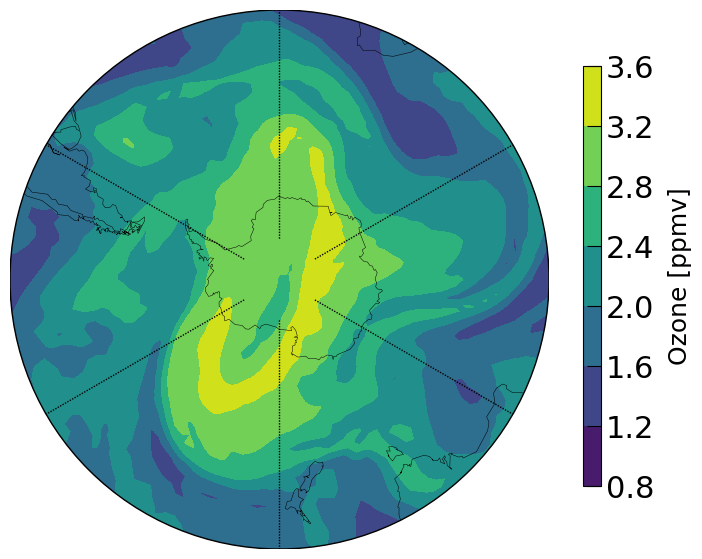

time: 603 ms


<IPython.core.display.Javascript object>

In [6]:
fig, ax, cb = plot_data(bus.data["Ozone"], level=475, scale=0.001, region="south")
cb.set_label(label="%s" % ("Ozone [ppmv]"), size=18)
# plt.savefig("/home/pankaj/Desktop/repro_ozone_435K.png", bbox_inches="tight")
plt.show()

In [10]:
files = sorted(glob.glob("/home/pankaj/Downloads/ant2020/*.nc"))[:-3]
ds = read_reprobus_data(files)
# ds.to_netcdf('/home/pankaj/Downloads/repro_antarctic_2020.nc')
ds

,Array,Chunk
Bytes,2.55 GB,11.92 MB
Shape,"(214, 180, 91, 91)","(1, 180, 91, 91)"
Count,856 Tasks,214 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,2.55 GB,11.92 MB
Shape,"(214, 180, 91, 91)","(1, 180, 91, 91)"
Count,856 Tasks,214 Chunks
Type,float64,numpy.ndarray


time: 1.52 s


<IPython.core.display.Javascript object>

In [11]:
frames = []
for time in tqdm(np.arange(1, 6)):
    frame = plot_gif(
        ds["Ozone"].sel(time="2020-05-%.2d" % time),
        level=450,
        scale=0.001,
        region="south",
    )
    frames.append(frame)

gif.save(frames, "./fig/reprobus_ozone.gif", duration=500)

100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.68it/s]

time: 3.1 s


<IPython.core.display.Javascript object>

![Reprobus Ozone 2020](./fig/reprobus_ozone.gif)